In [1]:
gen_path = '/content/drive/My Drive/Colab Notebooks/HAI/방학 과제/generator.pth'
dis_path = '/content/drive/My Drive/Colab Notebooks/HAI/방학 과제/discriminator.pth'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
import torchvision
from torchvision.utils import save_image
from torchvision.transforms import ToTensor
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.init_size = 7
        self.fc = nn.Linear(100, 128 * self.init_size * self.init_size)

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 128, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(True),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.Conv2d(64, 1, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        out = self.fc(z)
        out = out.view(out.size(0), 128, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img


In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.25),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.25),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.25),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.25),
            nn.Conv2d(512, 1, kernel_size=2, stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, img):
        validity = self.model(img)
        return validity.view(validity.size(0), -1)


In [6]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


In [7]:
generator = Generator()
discriminator = Discriminator()

# 저장된 파라미터를 불러오기 (지정된 경로)
generator.load_state_dict(torch.load(gen_path, map_location=torch.device('cpu')))
discriminator.load_state_dict(torch.load(dis_path, map_location=torch.device('cpu')))

<All keys matched successfully>

In [8]:
def show_generated_imgs(generator, latent_dim, num_images=5):
    z = torch.randn(num_images, latent_dim).to(device)
    gen_imgs = generator(z)
    gen_imgs = gen_imgs.view(gen_imgs.size(0), 1, 28, 28)
    gen_imgs = gen_imgs.detach().cpu().numpy()

    fig, axes = plt.subplots(1, num_images, figsize=(num_images, 1))
    for i in range(num_images):
        axes[i].imshow(np.transpose(gen_imgs[i], (1, 2, 0)).squeeze(), cmap='gray')
        axes[i].axis('off')
    plt.show()

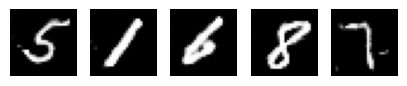

In [12]:
show_generated_imgs(generator, 100)